# Optuna and Annealing

In [1]:
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt

data = EpidData('spb', './', f'7-01-20{10+0}', f'6-20-20{10+0+1}')
init_infect = [100, 100]
model = FactoryBRModel.get_model('age-group')

d = Calibration(init_infect, model, data)
alpha, beta, rho = d.annealing_calibration()

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
# запускаем, так как последний эксперимент в калибровке необязательно лучший
model.simulate(
    alpha=alpha, 
    beta=beta, 
    initial_infectious=init_infect, 
    rho=rho, 
    modeling_duration=len(data)
)

0.6657199874689178
0.6858604166733578


[]

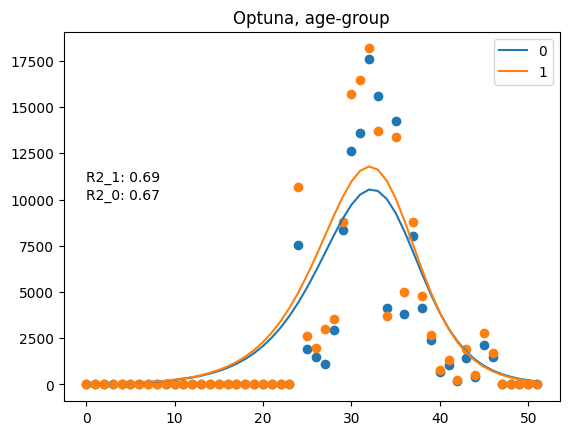

In [6]:
from sklearn.metrics import r2_score

for e, m in enumerate(zip(*model.get_result())):
    m, d = m
    print(r2_score(d, m))
    plt.text(0, 10000+e*1000, f'R2_{e}: {round(r2_score(d, m),2)}')
    plt.plot(m, label=str(e))
    plt.scatter([i for i in range(len(d))], d)
plt.title("Optuna, age-group")
plt.legend()
plt.plot()

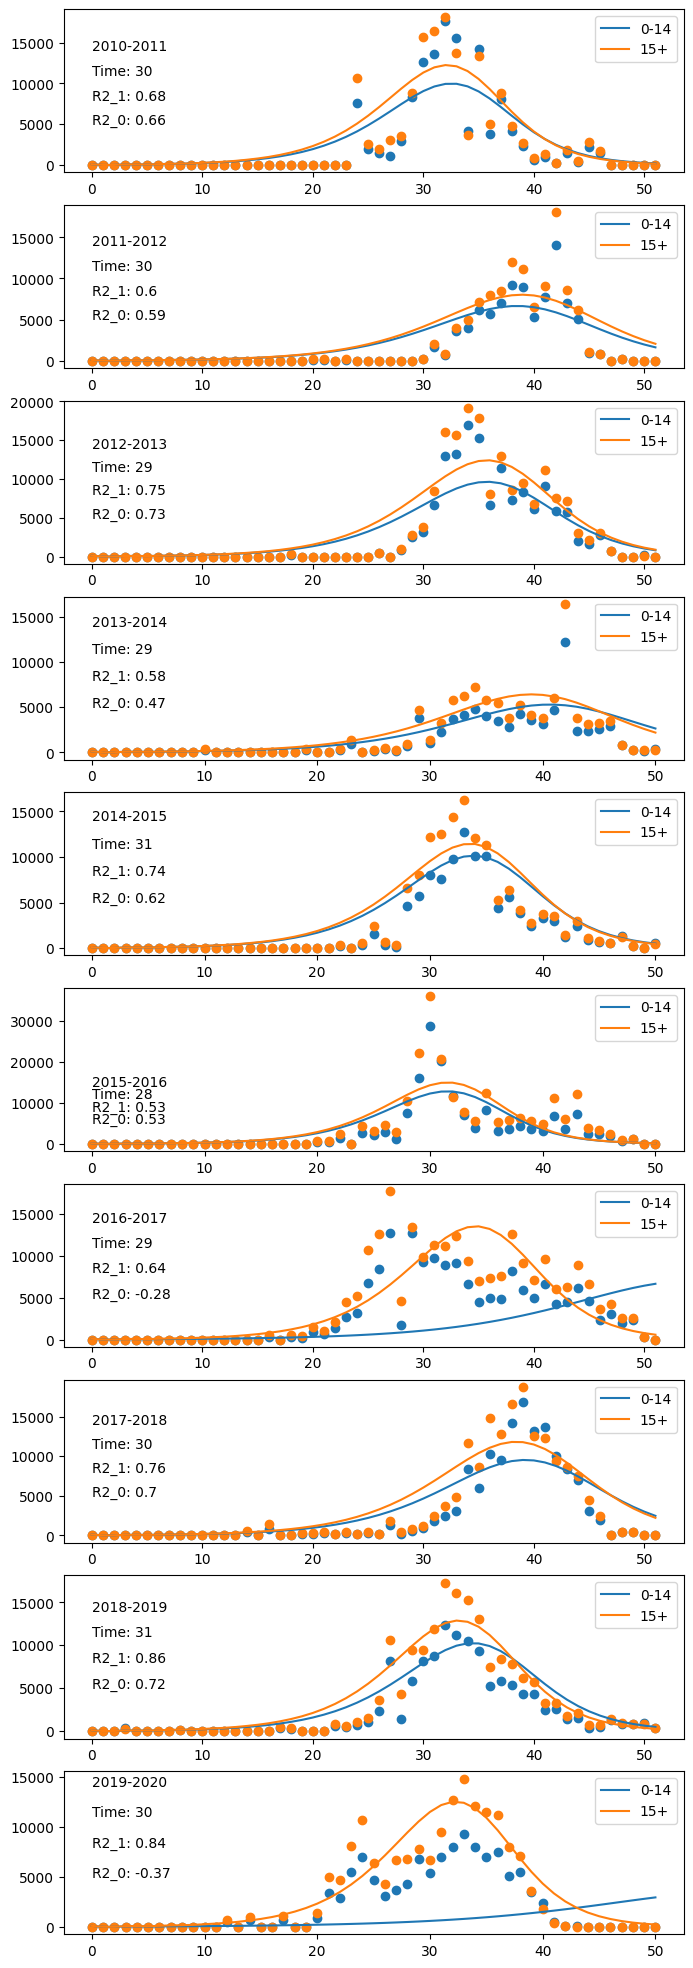

In [2]:
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import time


fig, ax = plt.subplots(10, 1, figsize=(8, 25))

# поменять при запуске
legend_dict = {0: '0-14', 1: '15+'}

for i in range(10):
    start = time.time()
    st_year = 2010
    data = EpidData('spb', './', f'7-01-{st_year+i}', f'6-20-{st_year+1+i}')
    init_infect = [100, 100]
    model = FactoryBRModel.age_group()

    d = Calibration(init_infect, model, data)
    alpha, beta, rho = d.optuna_calibration()

    model.simulate(
        alpha=alpha, 
        beta=beta, 
        initial_infectious=init_infect, 
        rho=rho, 
        modeling_duration=len(data)
    )

    for e, m in enumerate(zip(*model.get_result())):
        m, d = m
        ax[i].text(0, 5000 + e * 3000, f'R2_{e}: {round(r2_score(d, m),2)}')
        ax[i].plot(m, label=legend_dict[e])
        ax[i].scatter([i for i in range(len(d))], d)
    ax[i].text(0, 5000 + (e + 1) * 3000, f'Time: {round(time.time()-start)}')
    ax[i].text(0, 5000 + (e + 2) * 3000, f'{st_year+i}-{st_year+1+i}')
    ax[i].legend()

# ABC

In [1]:
import time
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt

start_time = time.time()
data = EpidData('spb', './', f'7-01-20{10+0}', f'6-20-20{10+0+1}')
init_infect = [100]
model = FactoryBRModel.get_model('total')

d = Calibration(init_infect, model, data)
posterior, rho = d.abc_calibration()

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Initializing SMC sampler...
Sampling 6 chains in 6 jobs


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


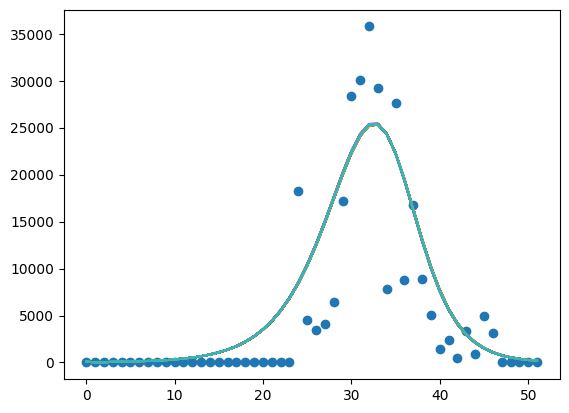

In [26]:

for a, b in zip(*alpha, *beta):
    model.simulate(
        alpha=[a], 
        beta=[b], 
        initial_infectious=init_infect, 
        rho=rho, 
        modeling_duration=len(data)
    )

    newly_inf, d = model.get_result()
    
    plt.plot(newly_inf)
plt.scatter([i for i in range(len(d))], d)

# Plot

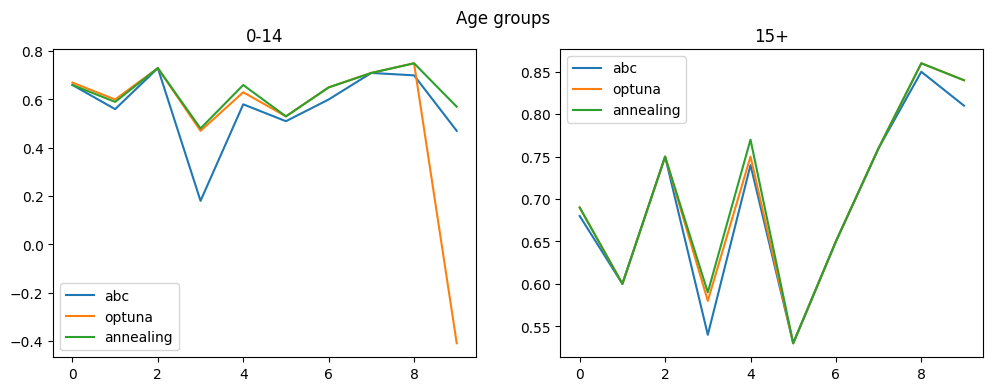

In [23]:
annealing_1 = [0.66, 0.59, 0.73, 0.48, 0.66, 0.53, 0.65, 0.71, 0.75, 0.57]
annealing_2 = [0.69, 0.6, 0.75, 0.59, 0.77, 0.53, 0.65, 0.76, 0.86, 0.84]

abc_1 = [0.66, 0.56, 0.73, 0.18, 0.58, 0.51, 0.6, 0.71, 0.7, 0.47]
abc_2 = [0.68, 0.6, 0.75, 0.54, 0.74, 0.53, 0.65, 0.76, 0.85, 0.81]

optuna_1 = [0.67, 0.6, 0.73, 0.47, 0.63, 0.53, 0.65, 0.71, 0.75, -0.41]
optuna_2 = [0.69, 0.6, 0.75, 0.58, 0.75, 0.53, 0.65, 0.76, 0.86, 0.84]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

fig.suptitle('Age groups')

ax[0].set_title('0-14')
ax[0].plot(abc_1, label='abc')
ax[0].plot(optuna_1, label='optuna')
ax[0].plot(annealing_1, label='annealing')
ax[0].legend()

ax[1].set_title('15+')
ax[1].plot(abc_2, label='abc')
ax[1].plot(optuna_2, label='optuna')
ax[1].plot(annealing_2, label='annealing')
ax[1].legend()

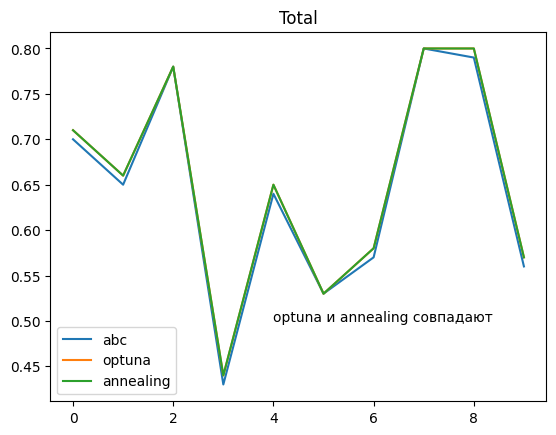

In [8]:
plt.title("Total")

abc = [0.7, 0.65, 0.78, 0.43, 0.64, 0.53, 0.57, 0.8, 0.79, 0.56]
optuna = [0.71, 0.66, 0.78, 0.44, 0.65, 0.53, 0.58, 0.8, 0.8, 0.57]
annealing = [0.71, 0.66, 0.78, 0.44, 0.65, 0.53, 0.58, 0.8, 0.8, 0.57]

plt.plot(abc, label='abc')
plt.plot(optuna, label='optuna')
plt.plot(annealing, label='annealing')
plt.text(4, 0.5, "optuna и annealing совпадают")
plt.legend()